## Laboratory Exercises 003: laplace_transform

- **Name:** Ernie James Mago
- **Term:** 1st term 2024-2025

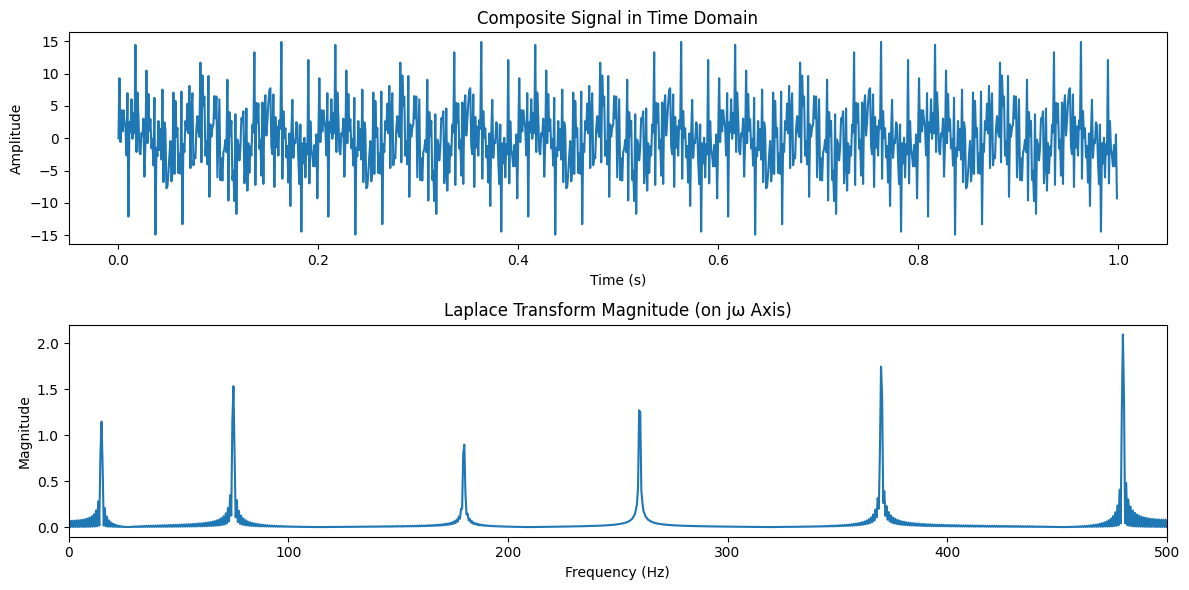

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define sampling parameters for a continuous-like signal
sampling_rate = 1000  # Hz (effective sampling rate to generate continuous approximation)
duration = 1  # seconds
t = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)

# Define multiple frequencies and corresponding amplitudes
frequencies = [15, 75, 180, 260, 370, 480]  # Frequencies of sine waves (Hz)
amplitudes = [2.3, 3.1, 1.9, 2.8, 3.6, 4.2]  # Corresponding amplitudes

# Generate the composite signal by summing sine waves with the given frequencies and amplitudes
signal = sum(amplitude * np.sin(2 * np.pi * frequency * t) for amplitude, frequency in zip(amplitudes, frequencies))

# Define a range of s values along the jω axis (s = jω, for frequencies from 0 to 500 Hz)
omega = np.linspace(0, 2 * np.pi * 500, 1000)  # Angular frequencies up to 500 Hz (in radians per second)
s_values = 1j * omega  # Define s = jω

# Calculate the Laplace Transform (Fourier-like on jω axis) as an integral approximation
laplace_transform_magnitude = []
for s in s_values:
    laplace_transform = sum(signal[n] * np.exp(-s * t[n]) for n in range(len(t))) / sampling_rate
    laplace_transform_magnitude.append(abs(laplace_transform))

# Plot the original composite signal in time domain
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(t, signal)
plt.title("Composite Signal in Time Domain")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")

# Plot the magnitude of the Laplace Transform (evaluated on the jω axis)
plt.subplot(2, 1, 2)
plt.plot(omega / (2 * np.pi), laplace_transform_magnitude)  # Convert omega to frequency in Hz
plt.title("Laplace Transform Magnitude (on jω Axis)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.xlim(0, 500)  # Limit the x-axis to show up to 500 Hz

plt.tight_layout()
plt.show()